ML_RF_SizeStratify_300to399
* Machine Learning Training Data : size stratification
* Data originally pooled from all technologies

In [187]:
"""
Imports
"""
import pandas as pd
import numpy as np
import graphviz
import io
from fancyimpute import KNN
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneOut
from scipy.stats import ks_2samp
from scipy import stats
from matplotlib import pyplot
from sklearn import preprocessing
from scipy.linalg import svd
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA as sklearnPCA
import plotly.plotly as py
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score, precision_score
from sklearn import preprocessing
from ggplot import *
from bokeh.charts import TimeSeries
from bokeh.models import HoverTool
from bokeh.plotting import show
from bokeh.charts import Scatter, Histogram, output_file, show
from bokeh.plotting import figure, show, output_file, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.charts import Bar, output_file, show
import bokeh.palettes as palettes
from bokeh.models import HoverTool, BoxSelectTool, Legend
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection)

In [188]:
# Import Training Data
df_20to49 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train_.csv')
df_50to99 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train_.csv')
df_100to299 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train_.csv')
df_300to399 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train_.csv')
df_400to499 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train_.csv')
df_500to999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train_.csv')
df_1000to5999 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train_.csv')
df_6000 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train_.csv')

In [189]:
# Copy Dataframes for later parsing tasks
df_20to49_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_20to49_train.csv')
df_50to99_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_50to99_train.csv')
df_100to299_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_100to299_train.csv')
df_300to399_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_300to399_train.csv')
df_400to499_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_400to499_train.csv')
df_500to999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_500to999_train.csv')
df_1000to5999_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_1000to5999_train.csv')
df_6000_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/train/df_6000_train.csv')

In [190]:
df_20to49['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

<a id='imbalance'></a>

<a id='hom_ref'></a>

In [191]:
# Import Test Data
df_20to49_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test_.csv')
df_50to99_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test_.csv')
df_100to299_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test_.csv')
df_300to399_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test_.csv')
df_400to499_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test_.csv')
df_500to999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test_.csv')
df_1000to5999_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test_.csv')
df_6000_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test_.csv')

In [192]:
# Import Test Data
df_20to49_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_20to49_test.csv')
df_50to99_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_50to99_test.csv')
df_100to299_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_100to299_test.csv')
df_300to399_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_300to399_test.csv')
df_400to499_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_400to499_test.csv')
df_500to999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_500to999_test.csv')
df_1000to5999_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_1000to5999_test.csv')
df_6000_test_ = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/test/df_6000_test.csv')

In [193]:
df_20to49_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [194]:
df_20to49_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_20to49_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_20to49_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_50to99_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_50to99_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_50to99_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_100to299_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_100to299_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_100to299_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_300to399_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_300to399_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_300to399_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_400to499_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_400to499_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_400to499_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_500to999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_500to999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_500to999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_1000to5999_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_1000to5999_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_1000to5999_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

df_6000_test_['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
df_6000_test_['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
df_6000_test_['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [195]:
# # Store header names in lists and find names that are NOT contained in BOTH lists
# c = list(df_train.columns.values)
# d = list(df_test.columns.values)
# set(d) - set(c)

***
EDA

Size distribution of sampled data set [all size datasets pooled]
***

In [196]:
# df_train = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/train/random_sample_SizeBins_szwt_train.csv')
# df_test = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/test/random_sample_SizeBins_szwt_test.csv')

In [197]:
# df_train['Size'].abs()
# df_test['Size'].abs()
# df_test = df_test[df_test['Size'] >= 20]

# df_train['log_size'] = np.log10(df_train.Size)
# df_test['log_size'] = np.log10(df_test.Size)

In [198]:
# sns.set_style("white")
# p = df_train['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Training Set')
# # plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_training.png', bbox_inches='tight') 

In [199]:
# sns.set_style("white")
# p = df_test['log_size'].hist(alpha = 0.5, bins = 30, edgecolor='black', label='hom_var')
# p.grid(False)
# p.set_xlabel('Size[log10]')
# p.set_ylabel('Frequency')
# p.set_title('Test Set')
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/SizeDist_test.png', bbox_inches='tight') 

***
**300-399bp**
***

***
Impute missing values using KNN
***

In [200]:
# Store training data in a new variable which will be converted to a matrix
X = df_300to399
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1,956.600000,13.402985,20.0,491.750000,130.580196,19.0,1.0,0.0,905.613527,...,9372.85,4264.606667,20.0,0,0,0,0.0,61293639,1,0.073248
1,2,981.564103,12.996636,39.0,454.589744,81.586424,38.0,1.0,0.0,891.000000,...,0.00,0.000000,0.0,0,0,0,0.0,20778541,1,0.090343
2,2,974.957447,16.901413,47.0,427.680851,53.699759,47.0,0.0,0.0,863.993421,...,0.00,0.000000,0.0,0,0,0,0.0,193355403,1,0.098361


In [201]:
# Convert dataframe to matrix
X=X.as_matrix()

#Imput missing values from three closest observations
X_imputed=KNN(k=3).complete(X)
X=pd.DataFrame(X_imputed)

Imputing row 1/227 with 1 missing, elapsed time: 0.047
Imputing row 101/227 with 2 missing, elapsed time: 0.056
Imputing row 201/227 with 2 missing, elapsed time: 0.066


In [202]:
# Store header values in a list, will be used later to re-label the matrix post KNN imputation
df_300to399_header = list(df_300to399.columns.values)
X.columns = df_300to399_header
X.head(3)

,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,1.0,956.600000,13.402985,20.0,491.750000,130.580196,19.0,1.0,0.0,905.613527,...,9372.85,4264.606667,20.0,0.0,0.0,0.0,0.0,61293639.0,1.0,0.073248
1,2.0,981.564103,12.996636,39.0,454.589744,81.586424,38.0,1.0,0.0,891.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,20778541.0,1.0,0.090343
2,2.0,974.957447,16.901413,47.0,427.680851,53.699759,47.0,0.0,0.0,863.993421,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,193355403.0,1.0,0.098361


In [203]:
# Store Labels in a new 'Y' DataFrame
Y = pd.DataFrame()
Y = X['GTcons']

In [204]:
#Count the number of labels
pd.value_counts(Y.values, sort=False)

1.0    87
2.0    85
0.0    55
dtype: int64

In [205]:
# Remove labels from feature set
X.drop(['GTcons'],axis=1, inplace = True)

In [206]:
# Order features
X4 = X.reindex_axis(sorted(X.columns), axis=1)

***
Machine Learning
***

<a id='machine_learning'></a>

** Train Random Forest Classifier **

<a id='multi_run'></a>

** Determine Number of trees: Out of Bag Error **

In [207]:
# Train Test Split
# Train on 70% of the data and test on 30%
X_train, X_test, y_train, y_test = train_test_split(X4, Y, test_size=0.3)

In [208]:
model = RandomForestClassifier(oob_score=True, class_weight='balanced') 
model.fit(X_train, y_train)

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.



RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

**NOTE :** 

Determined OOB score based on 70% of the training data

In [209]:
n_estimators = 50
trees = []
oob = []
for i in range(1, n_estimators):
    model.set_params(n_estimators=i)
    model.fit(X_train, y_train)
    trees += [i]
    oob += [model.oob_score_] 

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py:453: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/sklearn/ensemble/forest.py

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/matplotlib/axes/_axes.py:545: UserWarning:

No labelled objects found. Use label='...' kwarg on individual plots.



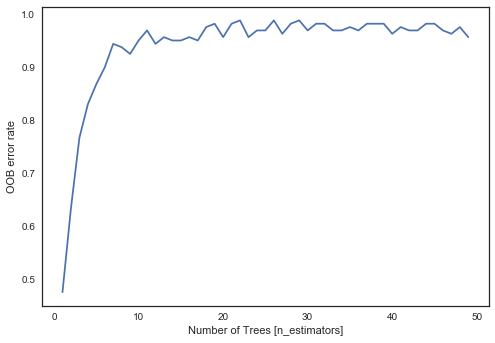

In [217]:
df_oob = pd.DataFrame()
df_oob['trees'] = trees
df_oob['oob'] = oob

ax = plt.plot(trees, oob)
sns.set_style("white")
plt.xlabel("Number of Trees [n_estimators]")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399bp_OOB.png', bbox_inches='tight')
plt.show()

** Train Model Using Optimal Tuning Parameters**

In [211]:
model = RandomForestClassifier(n_estimators=15, random_state=4, class_weight="balanced") 
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=15, n_jobs=1, oob_score=False, random_state=4,
            verbose=0, warm_start=False)

[Another Resource](https://stackoverflow.com/questions/37877542/how-to-label-the-feature-importance-with-forests-of-trees)

In [212]:
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)

<a id='100_trees'></a>

/Users/lmc2/anaconda/envs/NIHFAES/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning:

sort is deprecated, use sort_values(inplace=True) for INPLACE sorting



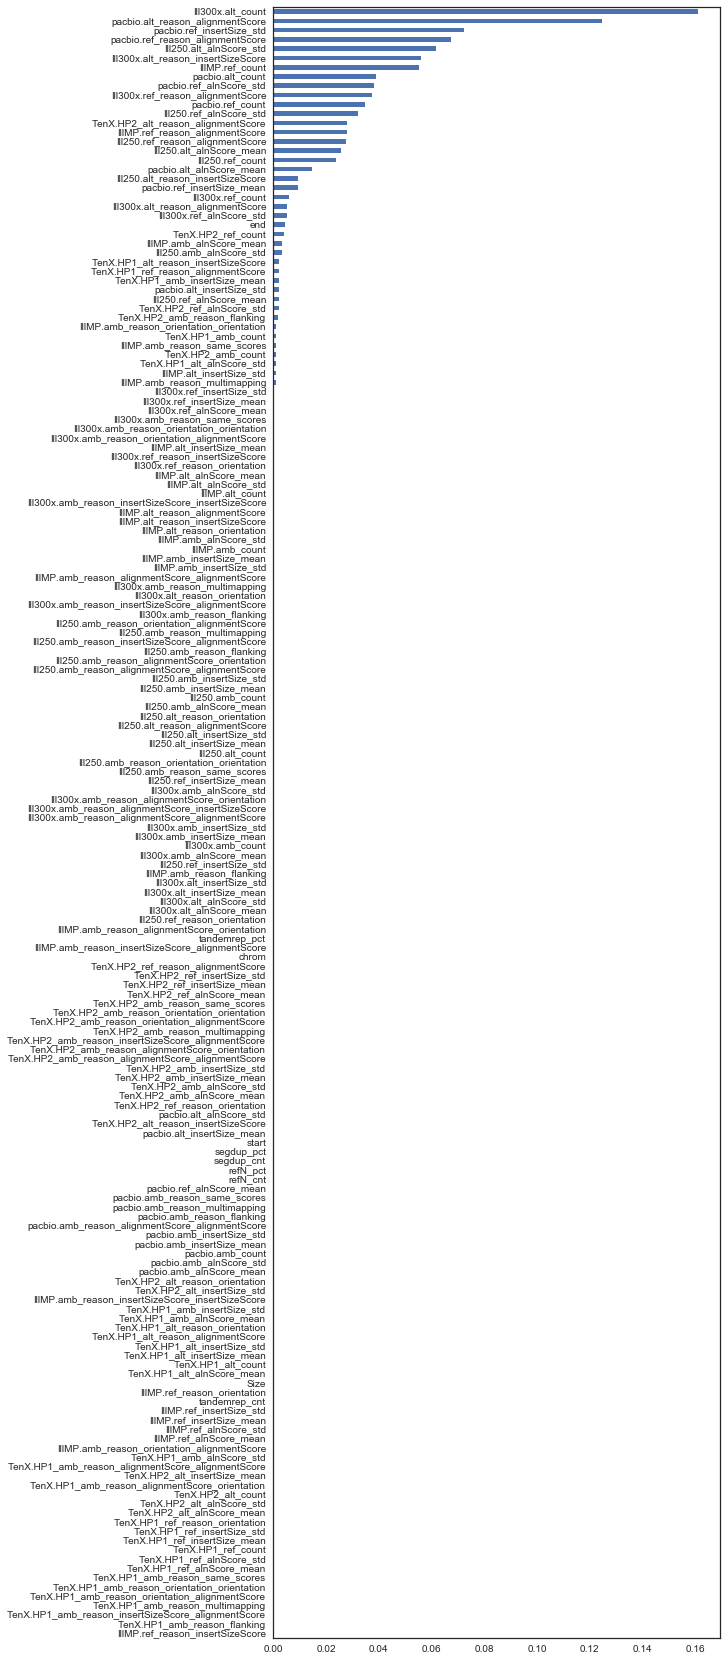

In [213]:
# # %matplotlib inline
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(8,30))
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/df_300to399_featureImportance.png', bbox_inches='tight')
plt.show()

In [214]:
feature_importances.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_feature_importance.csv')

In [215]:
X_ = X4[['Ill300x.alt_count','pacbio.alt_alnScore_mean','pacbio.ref_insertSize_mean','Ill300x.alt_reason_insertSizeScore','IllMP.ref_count','pacbio.alt_reason_alignmentScore','Ill250.ref_reason_alignmentScore','pacbio.ref_alnScore_std','pacbio.ref_insertSize_std','Ill250.ref_count','Ill250.alt_reason_alignmentScore','pacbio.ref_reason_alignmentScore','pacbio.alt_alnScore_std','pacbio.ref_alnScore_mean','pacbio.alt_insertSize_mean','Ill250.alt_alnScore_mean','Ill300x.ref_reason_alignmentScore','Ill250.alt_insertSize_std','IllMP.alt_reason_alignmentScore','Ill300x.ref_alnScore_std','Ill250.ref_alnScore_std','IllMP.alt_alnScore_std','TenX.HP1_alt_alnScore_std','Ill250.alt_reason_insertSizeScore','Ill250.alt_count']]

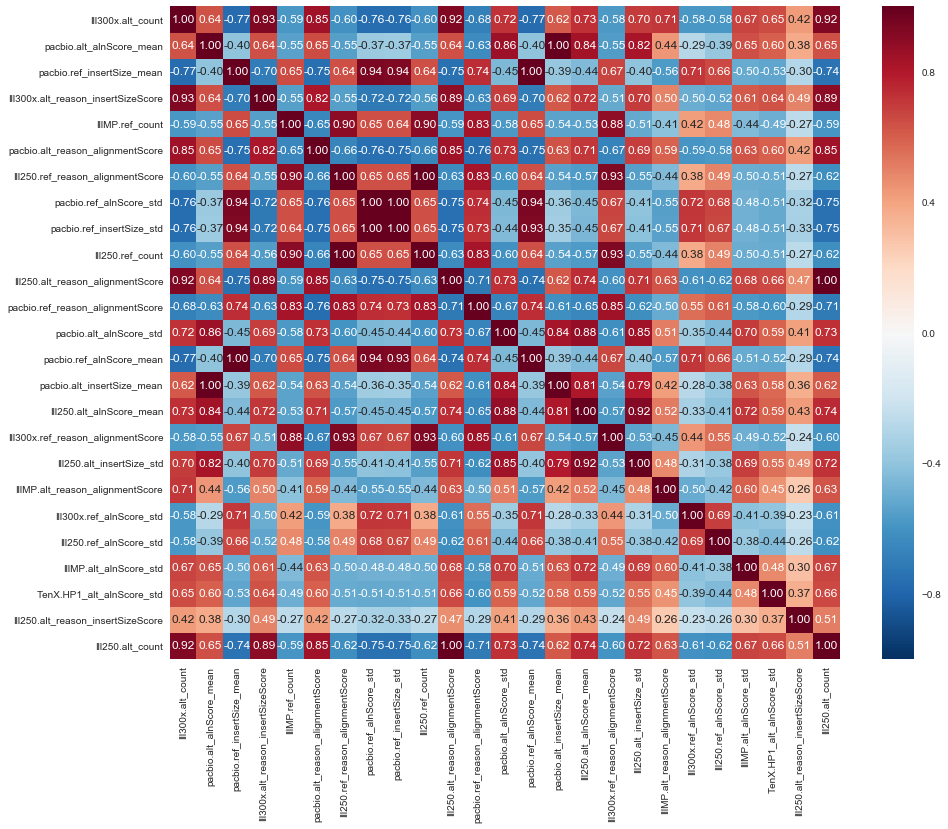

In [216]:
plt.figure(figsize=(15, 12))
sns.heatmap(X_.corr(), annot=True, fmt=".2f")
plt.xticks(rotation='vertical')
plt.yticks(rotation='horizontal')
# plt.figure(figsize=(18, 18))
plt.show()
# plt.savefig('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/df_300to399_heatmap.png', bbox_inches='tight')

In [28]:
#NOTE: Training Set - Show number of Hom Ref, Hom Var, Het Var datapoints the model was trained on
ytrain = pd.DataFrame()
ytrain['ytrain'] = y_train
pd.value_counts(ytrain['ytrain'].values, sort=False)

2.0    59
0.0    34
1.0    65
dtype: int64

<a id='prediction_step'></a>

In [29]:
pred = model.predict(X_test)

<a id='traintest_precision'></a>

In [30]:
print('Precision score of the training subset: {:.3f}'.format(precision_score(y_test, pred, average='micro'))) 

Precision score of the training subset: 0.957


In [31]:
from sklearn.metrics import accuracy_score
print('Accuracy score of the training subset: {:.3f}'.format(accuracy_score(y_test, pred))) 

Accuracy score of the training subset: 0.957


In [32]:
# Add original labels and predicted labels back to the original dataframe
df_Xtest = pd.DataFrame(X_test)
df_Xtest.head()

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
128,960.352941,32.660358,34.0,438.088235,65.483886,34.0,0.0,0.0,844.834395,159.559259,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,99108282.0,1.0,0.140673
54,980.113207,16.599228,53.0,432.641509,86.285637,52.0,0.0,1.0,884.090909,148.192479,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,75957783.0,1.0,0.109718
81,970.568965,21.663661,58.0,451.568966,83.011655,55.0,3.0,0.0,895.867470,151.934812,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,154096733.0,1.0,0.071875
57,988.045455,5.708664,22.0,406.590909,83.386100,22.0,0.0,0.0,851.318841,179.016084,...,10778.96000,4513.869590,25.0,0.0,0.0,0.0,0.0,130959394.0,2.0,0.181250
79,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,878.174107,132.488952,...,11433.60714,3984.164434,28.0,0.0,0.0,0.0,0.0,73272692.0,2.0,0.227848


In [33]:
labels = pd.DataFrame(y_test)

In [42]:
df_Xtest['predicted_label'] = pred
df_Xtest['GTcons'] = df_300to399['GTcons']
df_Xtest['chrom'] = df_300to399['chrom']
df_Xtest['start'] = df_300to399['start']
df_Xtest['end'] = df_300to399['end']

In [43]:
df_Xtest['GTcons'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['GTcons'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['GTcons'].replace(2.0, 'Homozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
df_Xtest['predicted_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
df_Xtest['predicted_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

In [44]:
pd.value_counts(df_Xtest['GTcons'].values, sort=False)

Homozygous_Reference    21
Heterozygous_Variant    22
Homozygous_Variant      26
dtype: int64

In [45]:
pd.value_counts(df_Xtest['predicted_label'].values, sort=False)

Homozygous_Reference    21
Heterozygous_Variant    23
Homozygous_Variant      25
dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix
ytest = df_Xtest['GTcons']
predict = df_Xtest['predicted_label']
print(confusion_matrix(ytest, predict))

[[21  1  0]
 [ 1 20  0]
 [ 1  0 25]]


In [47]:
pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,21,1,0,22
Homozygous_Reference,1,20,0,21
Homozygous_Variant,1,0,25,26
All,23,21,25,69


<a id='traintest_confusion_matrix'></a>

In [40]:
# # Pandas: save table to HTML
# p = pd.crosstab(ytest, predict, rownames=['True'], colnames=['Predicted'], margins=True)
# p.to_html('cro.html')

In [48]:
from sklearn.metrics import classification_report
print(classification_report(ytest, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       0.91      0.95      0.93        22
Homozygous_Reference       0.95      0.95      0.95        21
  Homozygous_Variant       1.00      0.96      0.98        26

         avg / total       0.96      0.96      0.96        69



***
Predict
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

In [49]:
df_300to399_test.drop(['GTcons'],axis=1, inplace=True)

In [50]:
X2 = df_300to399_test

** Impute missing values using KNN **

In [51]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/270 with 2 missing, elapsed time: 0.063
Imputing row 101/270 with 2 missing, elapsed time: 0.072
Imputing row 201/270 with 1 missing, elapsed time: 0.084


In [52]:
df_300to399_test_header = list(df_300to399_test.columns.values)
X2.columns = df_300to399_test_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,982.444444,16.001640,72.0,431.041667,77.702860,70.0,2.0,0.0,908.038462,140.266671,...,12929.0,0.0,1.0,0.0,0.0,0.0,0.0,4634801.0,1.0,0.103448
1,973.046512,18.202930,43.0,444.162791,87.432613,43.0,0.0,0.0,908.867816,117.260687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7716903.0,1.0,0.091483
2,982.878788,8.796547,33.0,451.606061,96.951078,32.0,0.0,1.0,862.944444,156.217135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27657263.0,0.0,0.000000


In [53]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,982.444444,16.001640,72.0,431.041667,77.702860,70.0,2.0,0.0,908.038462,140.266671,...,12929.0,0.0,1.0,0.0,0.0,0.0,0.0,4634801.0,1.0,0.103448
1,973.046512,18.202930,43.0,444.162791,87.432613,43.0,0.0,0.0,908.867816,117.260687,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7716903.0,1.0,0.091483
2,982.878788,8.796547,33.0,451.606061,96.951078,32.0,0.0,1.0,862.944444,156.217135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27657263.0,0.0,0.000000


In [54]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [55]:
pred = model.predict(X5)

In [56]:
pred_prob = model.predict_proba(X5)

In [57]:
pred_prob_log = model.predict_log_proba(X5)

In [58]:
X5['predicted_label'] = pred
X5['chrom'] = df_300to399_test_['chrom']
X5['GTcons'] = df_300to399_test_['GTcons']
X5['start'] = df_300to399_test_['start']
X5['end'] = df_300to399_test_['end']
X5['Size'] = df_300to399_test_['Size']
X5['GTsupp'] = df_300to399_test_['GTsupp']

In [59]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [60]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [61]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/df_300to399.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/300to399/df_300to399_log.csv', index=False)

In [62]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/df_300to399.csv')

In [63]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [64]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,GTsupp,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.0,0.333333,0.666667,2,1,982.444444,16.001640,72.0,431.041667,77.702860,...,0.0,1.0,2,0,0,0,0.0,4634801,1,0.103448
1,0.0,0.066667,0.933333,2,2,973.046512,18.202930,43.0,444.162791,87.432613,...,0.0,0.0,2,0,0,0,0.0,7716903,1,0.091483
2,0.0,0.000000,1.000000,2,3,982.878788,8.796547,33.0,451.606061,96.951078,...,0.0,0.0,2,0,0,0,0.0,27657263,0,0.000000


In [65]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/df_100to299_final.csv', index=False)

In [ ]:
# X6['GTcons'].replace('Homozygous_Reference', 0, inplace=True)
# X6['GTcons'].replace('Heterozygous_Variant', 1, inplace=True)
# X6['GTcons'].replace('Homozygous_Variant', 2, inplace=True)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X7['GTcons'].isnull().sum()

***
Label Analysis
***

In [66]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[ 63   2   0]
 [  0  96   0]
 [  0   2 107]]


In [67]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [68]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.985


In [69]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.985


In [70]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,96,0,0,96
Homozygous_Reference,2,63,0,65
Homozygous_Variant,2,0,107,109
All,100,63,107,270


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [71]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [72]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,86,0,0,86
Homozygous_Reference,0,52,0,52
Homozygous_Variant,0,0,86,86
All,86,52,86,224


In [73]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00        86
Homozygous_Reference       1.00      1.00      1.00        52
  Homozygous_Variant       1.00      1.00      1.00        86

         avg / total       1.00      1.00      1.00       224



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000+ bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 1000 - 6000+

In [ ]:
df = pd.concat([df_1000to5999, df_1000to5999_test, df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = df
df_ = pd.concat([df_1000to5999_, df_1000to5999_test_, df_6000_, df_6000_test_], axis=0)
df_ = df_.reset_index()

In [ ]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df_.drop(['index'],axis=1, inplace=True)

In [ ]:
X2 = df

** Impute missing values using KNN **

In [ ]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

In [ ]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

In [ ]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

In [ ]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [ ]:
pred = model.predict(X5)

In [ ]:
pred_prob = model.predict_proba(X5)

In [ ]:
pred_prob_log = model.predict_log_proba(X5)

In [ ]:
df[df.index.duplicated()]

In [ ]:
X5['predicted_label'] = pred
X5['chrom'] = df_['chrom']
X5['GTcons'] = df_['GTcons']
X5['start'] = df_['start']
X5['end'] = df_['end']
X5['Size'] = df_['Size']
X5['GTsupp'] = df_['GTsupp']

In [ ]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [ ]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_log._predLrgcsv', index=False)

In [ ]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_predLrg.csv')

In [ ]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [ ]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [ ]:
X6.head(3)

In [ ]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/100to299/100to299_final_predLrg.csv', index=False)

In [ ]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [ ]:
X6['predicted_GTcons_label'].dtypes

In [ ]:
X6.GTcons = X6.GTcons.astype(int)

In [ ]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

***
Label Analysis
***

In [ ]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

In [ ]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [ ]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

In [ ]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

In [ ]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [ ]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [ ]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 1000 - 5999 bp
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 1000 - 5999

In [87]:
df = pd.concat([df_1000to5999, df_1000to5999_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_1000to5999_, df_1000to5999_test_], axis=0)
df2 = df2.reset_index()

In [88]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [89]:
X2 = df

** Impute missing values using KNN **

In [90]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/227 with 1 missing, elapsed time: 0.046
Imputing row 101/227 with 1 missing, elapsed time: 0.060
Imputing row 201/227 with 57 missing, elapsed time: 0.065


In [91]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [92]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,872.238636,151.265870,...,10683.11594,5291.525830,69.0,0.0,0.0,0.0,0.0,66398770.0,6.0,0.097264
1,972.727273,15.764407,44.0,446.931818,81.055368,35.0,9.0,0.0,861.743750,161.249545,...,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,14189915.0,3.0,0.037082
2,977.161290,15.238103,31.0,422.161290,57.943853,28.0,3.0,0.0,886.130045,129.576288,...,10714.20833,3615.789459,24.0,0.0,0.0,0.0,0.0,20950622.0,10.0,0.076469


In [93]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [94]:
pred = model.predict(X5)

In [95]:
pred_prob = model.predict_proba(X5)

In [96]:
pred_prob_log = model.predict_log_proba(X5)

In [97]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [98]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df['GTsupp']

In [99]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [100]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [101]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_1000to5999_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_log_1000to5999_.csv', index=False)

In [102]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_1000to5999_predLrg.csv')

In [103]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [104]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [105]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.866667,0.133333,0.0,0,0.000000,0.000000,0,0.000000,0.000000,0,...,5291.525830,69.0,0,0,0,0,0.0,66398770,6,0.097264
1,0.000000,0.000000,1.0,2,972.727273,15.764407,44,446.931818,81.055368,35,...,0.000000,0.0,2,0,0,0,0.0,14189915,3,0.037082
2,0.000000,1.000000,0.0,1,977.161290,15.238103,31,422.161290,57.943853,28,...,3615.789459,24.0,1,0,0,0,0.0,20950622,10,0.076469


In [107]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_final_1000to5999_predLrg.csv', index=False)

In [108]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [109]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [110]:
X6.GTcons = X6.GTcons.astype(int)

In [111]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    93
1    80
2    54
dtype: int64


***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [112]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[89  4  0]
 [ 0 80  0]
 [ 0  4 50]]


In [113]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [114]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.965


In [115]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.965


In [116]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,80,0,0,80
Homozygous_Reference,4,89,0,93
Homozygous_Variant,4,0,50,54
All,88,89,50,227


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [117]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [118]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,74,0,0,74
Homozygous_Reference,0,22,0,22
Homozygous_Variant,0,0,32,32
All,74,22,32,128


In [119]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00        74
Homozygous_Reference       1.00      1.00      1.00        22
  Homozygous_Variant       1.00      1.00      1.00        32

         avg / total       1.00      1.00      1.00       128



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 6000+ bp
***

<a id='predict'></a>

Description:

   * In the [previous section](#machine_learning), a RF model was trained on svanalyzer data.

       * The model was trained using [train/test split](#train_test) where 70% of the data was used to train the model and the model performance was determined by predicting labels for the remaining 30% of the data
 * Reminder: The labels for this training set and the following [prediction step](#prediction_step) are the consensus genotype (GTcons) labels generated from a preliminary R analysis based on reference and alternate read count:
           * Homozygous Reference (0)
           * Heterozygous Variant (1)
           * Homozygous Variant (2)
           
   * The trained model is used in the following section to predict labels for 5000 randomly selected Deletions [these datapoints were randomly selected from [union_170509_refalt.sort.vcf](ftp://ftp-trace.ncbi.nlm.nih.gov/giab/ftp/data/AshkenazimTrio/analysis/NIST_UnionSVs_05092017/)]
   
   

** Load Data **

* Pool all datasets with large variants 6000+

In [120]:
df = pd.concat([df_6000, df_6000_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_6000, df_6000_test], axis=0)
df2 = df2.reset_index()

In [121]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [122]:
X2 = df

** Impute missing values using KNN **

In [123]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/57 with 2 missing, elapsed time: 0.005


In [124]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,938.807692,17.007960,52.0,478.903846,84.485834,45.0,7.0,0.0,897.581731,141.008841,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,151456429.0,9.0,0.031567
1,967.517241,14.852425,29.0,430.965517,70.471556,28.0,1.0,0.0,882.136546,141.793126,...,9140.708333,4370.268586,72.000000,0.0,0.0,0.0,0.000000,146862618.0,33.0,0.055111
2,977.700000,17.343875,20.0,451.850000,87.001882,17.0,3.0,0.0,844.818436,134.444514,...,9168.799423,4232.174053,109.449801,0.0,0.0,4.0,0.076523,72766323.0,110.0,0.059979


In [125]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,938.807692,17.007960,52.0,478.903846,84.485834,45.0,7.0,0.0,897.581731,141.008841,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,151456429.0,9.0,0.031567
1,967.517241,14.852425,29.0,430.965517,70.471556,28.0,1.0,0.0,882.136546,141.793126,...,9140.708333,4370.268586,72.000000,0.0,0.0,0.0,0.000000,146862618.0,33.0,0.055111
2,977.700000,17.343875,20.0,451.850000,87.001882,17.0,3.0,0.0,844.818436,134.444514,...,9168.799423,4232.174053,109.449801,0.0,0.0,4.0,0.076523,72766323.0,110.0,0.059979


In [126]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [127]:
pred = model.predict(X5)

In [128]:
pred_prob = model.predict_proba(X5)

In [129]:
pred_prob_log = model.predict_log_proba(X5)

In [130]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [131]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [134]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [135]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [136]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_6000_predLrg.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_log_6000_.csv', index=False)

In [137]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_6000_predLrg.csv')

In [138]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [139]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [140]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.000000,1.0,2,938.807692,17.007960,52.0,478.903846,84.485834,45.0,...,0.000000,0.000000,2,0,0,0,0.000000,151456429,9,0.031567
1,0.000000,1.000000,0.0,1,967.517241,14.852425,29.0,430.965517,70.471556,28.0,...,4370.268586,72.000000,1,0,0,0,0.000000,146862618,33,0.055111
2,0.533333,0.466667,0.0,1,977.700000,17.343875,20.0,451.850000,87.001882,17.0,...,4232.174053,109.449801,0,0,0,4,0.076523,72766323,110,0.059979


In [141]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_final_6000_predLrg.csv', index=False)

In [142]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [143]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [144]:
X6.GTcons = X6.GTcons.astype(int)

In [145]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0    27
1    20
2    10
dtype: int64


***
Label Analysis
***

Description:
  * The [random forest(RF) model](#train_test) was trained on svanalyzer data. The trained model was used to predict consensus GT labels for the 5000 deletions that were randomly selected from the union_refalt vcf. The following is a comparison of model predicted labels [Conesus GT] to consensus genotype generated by the R script for the 5000 randomly selected datapoints from union_refalt.vcf 

In [146]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[27  0  0]
 [ 2 18  0]
 [ 0  0 10]]


In [147]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [148]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.965


In [149]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.965


In [150]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,18,2,0,20
Homozygous_Reference,0,27,0,27
Homozygous_Variant,0,0,10,10
All,18,29,10,57


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [151]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [152]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,18,0,0,18
Homozygous_Reference,0,21,0,21
Homozygous_Variant,0,0,7,7
All,18,21,7,46


In [153]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00        18
Homozygous_Reference       1.00      1.00      1.00        21
  Homozygous_Variant       1.00      1.00      1.00         7

         avg / total       1.00      1.00      1.00        46



***
**Predict**


How well does a model trained on small variants predict GT of large variants?
Variants : 20 to 49bp
***

<a id='predict'></a>

** Load Data **

* Pool all datasets with large variants 20 to 49bp

In [154]:
df = pd.concat([df_20to49, df_20to49_test], axis=0)
df = df.reset_index()
df2 = pd.concat([df_20to49, df_20to49_test], axis=0)
df2 = df2.reset_index()

In [155]:
df.drop(['GTcons'],axis=1, inplace=True)
df.drop(['index'],axis=1, inplace=True)
df2.drop(['index'],axis=1, inplace=True)

In [156]:
X2 = df

** Impute missing values using KNN **

In [158]:
#Convert dataframe to matrix
X2=X2.as_matrix()
X2=pd.DataFrame(X2)

# Imput missing values from three closest observations
X2_imputed=KNN(k=3).complete(X2)
X2=pd.DataFrame(X2_imputed)

Imputing row 1/3350 with 1 missing, elapsed time: 9.642
Imputing row 101/3350 with 1 missing, elapsed time: 9.662
Imputing row 201/3350 with 2 missing, elapsed time: 9.676
Imputing row 301/3350 with 2 missing, elapsed time: 9.690
Imputing row 401/3350 with 2 missing, elapsed time: 9.705
Imputing row 501/3350 with 2 missing, elapsed time: 9.722
Imputing row 601/3350 with 1 missing, elapsed time: 9.734
Imputing row 701/3350 with 2 missing, elapsed time: 9.749
Imputing row 801/3350 with 1 missing, elapsed time: 9.764
Imputing row 901/3350 with 58 missing, elapsed time: 9.777
Imputing row 1001/3350 with 2 missing, elapsed time: 9.788
Imputing row 1101/3350 with 1 missing, elapsed time: 9.808
Imputing row 1201/3350 with 2 missing, elapsed time: 9.822
Imputing row 1301/3350 with 2 missing, elapsed time: 9.841
Imputing row 1401/3350 with 1 missing, elapsed time: 9.860
Imputing row 1501/3350 with 2 missing, elapsed time: 9.884
Imputing row 1601/3350 with 2 missing, elapsed time: 9.895
Imputing

In [159]:
df_header = list(df.columns.values)
X2.columns = df_header
X2.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,976.871795,12.113098,39.0,431.384615,91.092406,39.0,0.0,0.0,890.273292,144.669681,...,8754.50,3356.194618,30.0,0.0,0.0,0.0,0.0,65359519.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,907.097143,146.444984,...,10767.32,3791.304854,50.0,0.0,0.0,0.0,0.0,44564287.0,1.0,1.000000
2,980.865672,12.845692,67.0,430.701492,88.234426,67.0,0.0,0.0,883.863905,158.467660,...,18545.00,0.000000,1.0,0.0,0.0,1.0,1.0,96806440.0,1.0,0.586207


In [160]:
X3 = pd.DataFrame()
X3 = X2
X3.head(3)

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,976.871795,12.113098,39.0,431.384615,91.092406,39.0,0.0,0.0,890.273292,144.669681,...,8754.50,3356.194618,30.0,0.0,0.0,0.0,0.0,65359519.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,907.097143,146.444984,...,10767.32,3791.304854,50.0,0.0,0.0,0.0,0.0,44564287.0,1.0,1.000000
2,980.865672,12.845692,67.0,430.701492,88.234426,67.0,0.0,0.0,883.863905,158.467660,...,18545.00,0.000000,1.0,0.0,0.0,1.0,1.0,96806440.0,1.0,0.586207


In [161]:
# Order features
X5 = X2.reindex_axis(sorted(X2.columns), axis=1)

<a id='prediction_step'></a>

In [162]:
pred = model.predict(X5)

In [163]:
pred_prob = model.predict_proba(X5)

In [164]:
pred_prob_log = model.predict_log_proba(X5)

In [165]:
df[df.index.duplicated()]

,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,Ill250.alt_reason_insertSizeScore,Ill250.alt_reason_orientation,Ill250.amb_alnScore_mean,Ill250.amb_alnScore_std,...,pacbio.ref_insertSize_mean,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct


In [166]:
X5['predicted_label'] = pred
X5['chrom'] = df2['chrom']
X5['GTcons'] = df2['GTcons']
X5['start'] = df2['start']
X5['end'] = df2['end']
X5['Size'] = df2['Size']
# X5['GTsupp'] = df2['GTsupp']

In [167]:
X6 = pd.concat([X5, pd.DataFrame(pred_prob, columns=['1','2','3'])])

In [168]:
X7 = pd.concat([X5, pd.DataFrame(pred_prob_log, columns=['1','2','3'])])

In [169]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_20to49_predsm.csv', index=False)

In [ ]:
X7.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_log_20to49_.csv', index=False)

In [170]:
X6 = pd.read_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_20to49_predsm.csv')

In [171]:
X6.rename(columns={'1': 'Homozygous_Reference_GTcons'}, inplace=True)
X6.rename(columns={'2': 'Heterozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'3': 'Homozygous_Variant_GTcons'}, inplace=True)
X6.rename(columns={'predicted_label': 'predicted_GTcons_label'}, inplace=True)

In [172]:
X6['GTcons'].replace('Homozygous_Reference', '0', inplace=True)
X6['GTcons'].replace('Heterozygous_Variant', '1', inplace=True)
X6['GTcons'].replace('Homozygous_Variant', '2', inplace=True)

In [173]:
X6.head(3)

,Homozygous_Reference_GTcons,Heterozygous_Variant_GTcons,Homozygous_Variant_GTcons,GTcons,Ill250.alt_alnScore_mean,Ill250.alt_alnScore_std,Ill250.alt_count,Ill250.alt_insertSize_mean,Ill250.alt_insertSize_std,Ill250.alt_reason_alignmentScore,...,pacbio.ref_insertSize_std,pacbio.ref_reason_alignmentScore,predicted_GTcons_label,refN_cnt,refN_pct,segdup_cnt,segdup_pct,start,tandemrep_cnt,tandemrep_pct
0,0.000000,0.933333,0.066667,1,976.871795,12.113098,39.0,431.384615,91.092406,39.0,...,3356.194618,30.0,1,0,0,0,0.0,65359519,0,0.000000
1,0.666667,0.333333,0.000000,0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,...,3791.304854,50.0,0,0,0,0,0.0,44564287,1,1.000000
2,0.000000,0.600000,0.400000,1,980.865672,12.845692,67.0,430.701492,88.234426,67.0,...,0.000000,1.0,1,0,0,1,1.0,96806440,1,0.586207


In [174]:
X6.to_csv('/Volumes/lesleydata/RF_model_trainingData_test/size_data/results/figures/300to399/300to399_final_20to49_predsm.csv', index=False)

In [175]:
# X6['GTcons'].fillna(999)
# X7 = X6[X6.GTcons != 999]
# X6['predicted_GTcons_label'].isnull().sum()

In [176]:
X6['predicted_GTcons_label'].dtypes

dtype('int64')

In [177]:
X6.GTcons = X6.GTcons.astype(int)

In [178]:
print (pd.value_counts(X6['GTcons'].values, sort=False))

0     945
2     581
1    1824
dtype: int64


***
Label Analysis
***

In [179]:
from sklearn.metrics import confusion_matrix
consensus_GT = X6['GTcons']
predict = X6['predicted_GTcons_label']
print(confusion_matrix(consensus_GT, predict))

[[ 931   13    1]
 [  20 1799    5]
 [   3  223  355]]


In [180]:
X6['GTcons'].replace(0, 'Homozygous_Reference', inplace=True)
X6['GTcons'].replace(1, 'Heterozygous_Variant', inplace=True)
X6['GTcons'].replace(2, 'Homozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(0.0, 'Homozygous_Reference', inplace=True)
X6['predicted_GTcons_label'].replace(1.0, 'Heterozygous_Variant', inplace=True)
X6['predicted_GTcons_label'].replace(2.0, 'Homozygous_Variant', inplace=True)

<a id='predict_precision_score_matrix'></a>

In [181]:
print('Precision score of the prediction subset: {:.3f}'.format(precision_score(consensus_GT, predict, average='micro'))) 

Precision score of the prediction subset: 0.921


In [182]:
print('Accuracy score of the prediction subset: {:.3f}'.format(accuracy_score(consensus_GT, predict))) 

Accuracy score of the prediction subset: 0.921


In [183]:
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1799,20,5,1824
Homozygous_Reference,13,931,1,945
Homozygous_Variant,223,3,355,581
All,2035,954,361,3350


** High Confidence Label Analysis**
* **Reminder:** The labels predicted by the model are the following consensus genotype:
    * Homozygous Reference: 0 
    * Heterozygous Variant: 1 
    * Homozygous Variant: 2 
* Here **high confidence labels** are the GTcons labels predicted by the model that were also assigned a predict probability of either 0.9 or 1


In [184]:
high_conf_labels = X6[(X6['Homozygous_Reference_GTcons'] == 1) | (X6['Homozygous_Reference_GTcons'] >= 0.9) | (X6['Heterozygous_Variant_GTcons'] == 1) | (X6['Heterozygous_Variant_GTcons'] >= 0.9) | (X6['Homozygous_Variant_GTcons'] == 1) | (X6['Homozygous_Variant_GTcons'] >= 0.9)]


<a id='hiconf_precision_score'></a>

In [185]:
consensus_GT = high_conf_labels['GTcons']
predict = high_conf_labels['predicted_GTcons_label']
pd.crosstab(consensus_GT, predict, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Heterozygous_Variant,Homozygous_Reference,Homozygous_Variant,All
True,,,,
Heterozygous_Variant,1031,0,0,1031
Homozygous_Reference,0,718,0,718
Homozygous_Variant,0,0,46,46
All,1031,718,46,1795


In [186]:
from sklearn.metrics import classification_report
print(classification_report(consensus_GT, predict))

                      precision    recall  f1-score   support

Heterozygous_Variant       1.00      1.00      1.00      1031
Homozygous_Reference       1.00      1.00      1.00       718
  Homozygous_Variant       1.00      1.00      1.00        46

         avg / total       1.00      1.00      1.00      1795

